In [10]:
import psycopg2
from datetime import datetime
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import time
import sys
sys.path.append("..") 
from creds import rds_url, rds_port, rds_db, rds_username, rds_password, user, password
import pandas as pd
import pandas.io.sql as sqlio

from data_utils import render_data, fx

In [11]:
conn = psycopg2.connect(
    host=rds_url,
    port=rds_port,
    dbname=rds_db,
    user=rds_username,
    password=rds_password)

In [12]:
# d,s = render_data(conn, '1414')
stim_dat = sqlio.read_sql_query("select * from stimulus", conn)

In [13]:
stim_dat[stim_dat['experiment_id']=='101101']

,time_stamp,user_id,session_id,experiment_id,condition,user_agent,stim,response
39968,2021-02-17 03:29:26.321368,12.222.97.130,6937AA6EE7FDF0AC,101101,0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5...,130,0
39969,2021-02-17 03:29:37.561028,12.222.97.130,6937AA6EE7FDF0AC,101101,0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5...,53,0
39970,2021-02-17 03:29:42.404257,12.222.97.130,6937AA6EE7FDF0AC,101101,0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5...,21,0
40114,2021-02-17 04:10:50.067995,12.222.97.130,5C247317104ADB88,101101,0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5...,introCard[dwell],1100
40115,2021-02-17 04:10:50.138028,12.222.97.130,5C247317104ADB88,101101,0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5...,card33[dwell],1100
40116,2021-02-17 04:10:50.208069,12.222.97.130,5C247317104ADB88,101101,0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5...,card0[dwell],0
40117,2021-02-17 04:10:50.278778,12.222.97.130,5C247317104ADB88,101101,0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5...,card117[dwell],0
40118,2021-02-17 04:10:50.348990,12.222.97.130,5C247317104ADB88,101101,0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5...,card22[dwell],0
40119,2021-02-17 04:10:50.418872,12.222.97.130,5C247317104ADB88,101101,0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5...,card19[dwell],0
40120,2021-02-17 04:10:50.489392,12.222.97.130,5C247317104ADB88,101101,0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5...,card26[dwell],0


In [3]:
demo_query = "select * from demographics"
stim_query = "select * from stimulus"

demo_dat = sqlio.read_sql_query(demo_query, conn)
stim_dat = sqlio.read_sql_query(stim_query, conn)

In [29]:
d = pd.read_csv("/Users/zive/GDrive/research/design-misinfo/yourfeed/static/assets/data/aj_headlines.csv").reset_index()
d.to_csv("/Users/zive/GDrive/research/design-misinfo/yourfeed/static/assets/data/aj_headlines.csv")

In [24]:
d = demo_dat[(demo_dat['experiment_id'] == '{e:/Field/experiment_id}')]

In [25]:
d

,time_stamp,user_id,session_id,experiment_id,condition,user_agent,field,value
25834,2020-05-25 13:46:07.792456,209.6.44.222,BE214F081F14396E,{e:/Field/experiment_id},1,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6...,rid,-1
25866,2020-05-26 08:39:49.823132,70.99.232.101,4CA116AD6EF931B0,{e:/Field/experiment_id},1,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4...,rid,-1
25867,2020-05-26 08:41:41.854028,70.99.232.101,4CA116AD6EF931B0,{e:/Field/experiment_id},3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4...,rid,-1
25869,2020-05-26 15:21:10.849897,174.21.160.255,59000C092E69FA52,{e:/Field/experiment_id},3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_3...,crt_ages,8
25870,2020-05-26 15:15:57.134180,174.21.160.255,CC0769ED3C0B897F,{e:/Field/experiment_id},3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_3...,rid,TeSThttps:/mit.co1.qualtrics.com/jfe/form/SV_9...
25871,2020-05-26 15:19:32.579522,174.21.160.255,59000C092E69FA52,{e:/Field/experiment_id},3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_3...,rid,[TEST
25872,2020-05-26 15:19:51.797263,174.21.160.255,59000C092E69FA52,{e:/Field/experiment_id},3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_3...,has_facebook,1
25873,2020-05-26 15:19:51.865351,174.21.160.255,59000C092E69FA52,{e:/Field/experiment_id},3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_3...,has_twitter,2
25874,2020-05-26 15:19:51.933513,174.21.160.255,59000C092E69FA52,{e:/Field/experiment_id},3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_3...,has_instagram,1
25875,2020-05-26 15:19:52.001621,174.21.160.255,59000C092E69FA52,{e:/Field/experiment_id},3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_3...,has_whatsapp,1


In [37]:
d.groupby(["user_id", "session_id"]).size()

user_id          session_id      
100.37.226.96    92163762EC520F26    51
104.14.77.213    FFA04F8BC9B303B4     7
104.171.250.199  0970C2F9F26E38F0    16
104.174.229.52   C9A6876D0088B6EB     1
104.186.177.49   79CAF25733C03F5E    10
104.230.79.167   C139878CCD2A3D6F     7
104.35.196.105   93CD847A012B626D    15
104.5.216.190    7406C33601221BEF    51
104.62.137.191   3A17A9A91CFF122F     7
107.174.14.88    7FF62814A501D7AD    50
107.204.23.124   69FB2F3B0D984333     9
107.221.72.67    E1BD2B55D1C6B9B7     9
107.242.113.46   9994642B87180E1E     1
107.77.104.81    D25157973DBF2E18     1
107.77.169.1     BB4109A6D0294267    50
107.77.169.2     2A43CDED26F4574B    55
107.77.189.4     388440817BDF508E     1
107.77.253.46    2D0CFFA653A57BD6    50
107.77.68.127    29166650161C1C8C    17
108.200.94.244   E88B8BAA2EB010EE    52
108.211.158.129  B935FC9C15CD6EBF     7
108.228.33.185   3A2B134829A93B35    81
108.231.85.75    2957AFC5896D057F     1
108.245.99.157   773A8381DA82DD7D    10
108.30

In [143]:
timedata = []
for user in users:
    try:
        start_feed = d[(d['session_id'] == user) & (d['field'] == 'order')]['time_stamp'].values[0]
#         start = d[(d['session_id'] == user) & (d['field'] == 'has_twitter')]['time_stamp'].values[0]
        crt_end = d[(d['session_id'] == user) & (d['field'] == 'crt_race')]['time_stamp'].values[0]
        demo_end = d[(d['session_id'] == user) & (d['field'] == 'length')]['time_stamp'].values[0]
        
        start_feed = datetime.strptime(start_feed,  '%Y-%m-%d %H:%M:%S.%f')
        crt_end = datetime.strptime(crt_end,  '%Y-%m-%d %H:%M:%S.%f')
        demo_end = datetime.strptime(demo_end,  '%Y-%m-%d %H:%M:%S.%f')
    except:
        continue
#     survey_length = (demo_end - start).astype('timedelta64[m]').astype(int)
#     start_length = (start_feed - start).astype('timedelta64[m]').astype(int)
#     feed_length = (crt_end - start_feed).astype('timedelta64[m]').astype(int)
    feed_length = (crt_end - start_feed).seconds/60
#     demo_length = (demo_end - crt_end).astype('timedelta64[m]').astype(int)
    demo_length = (demo_end - crt_end).seconds/60
    print("survey_length: {}, start_length:{}, feed_length:{}, demo_length: {}".format(survey_length,start_length,feed_length,demo_length ))
    timedata.append((survey_length,start_length,feed_length,demo_length))
    
    


survey_length: 7, start_length:0, feed_length:1.4, demo_length: 1.5333333333333334
survey_length: 7, start_length:0, feed_length:2.3333333333333335, demo_length: 2.3833333333333333
survey_length: 7, start_length:0, feed_length:2.283333333333333, demo_length: 8.883333333333333
survey_length: 7, start_length:0, feed_length:1.3333333333333333, demo_length: 3.1166666666666667
survey_length: 7, start_length:0, feed_length:1.9666666666666666, demo_length: 2.466666666666667
survey_length: 7, start_length:0, feed_length:10.583333333333334, demo_length: 12.2
survey_length: 7, start_length:0, feed_length:3.4166666666666665, demo_length: 3.6
survey_length: 7, start_length:0, feed_length:1.1166666666666667, demo_length: 1.7166666666666666
survey_length: 7, start_length:0, feed_length:2.533333333333333, demo_length: 5.1
survey_length: 7, start_length:0, feed_length:0.4, demo_length: 1.2333333333333334
survey_length: 7, start_length:0, feed_length:1.1833333333333333, demo_length: 1.2833333333333334


survey_length: 7, start_length:0, feed_length:4.583333333333333, demo_length: 5.883333333333334
survey_length: 7, start_length:0, feed_length:5.883333333333334, demo_length: 6.166666666666667
survey_length: 7, start_length:0, feed_length:2.4166666666666665, demo_length: 11.7
survey_length: 7, start_length:0, feed_length:4.916666666666667, demo_length: 3.8833333333333333
survey_length: 7, start_length:0, feed_length:2.9833333333333334, demo_length: 3.683333333333333
survey_length: 7, start_length:0, feed_length:1.7, demo_length: 3.3
survey_length: 7, start_length:0, feed_length:1.95, demo_length: 7.566666666666666
survey_length: 7, start_length:0, feed_length:2.2, demo_length: 2.8
survey_length: 7, start_length:0, feed_length:2.2666666666666666, demo_length: 4.183333333333334
survey_length: 7, start_length:0, feed_length:1.1, demo_length: 3.316666666666667
survey_length: 7, start_length:0, feed_length:0.7666666666666667, demo_length: 2.316666666666667
survey_length: 7, start_length:0, f

In [141]:
(crt_end - start_feed).seconds/60

1.4

In [147]:
t = pd.DataFrame(timedata)
t.columns = ["total", "a", "b","c"]

In [148]:
t['c'].mean()

3.673563218390806

In [151]:
t['b'].mean()

2.596666666666667

In [150]:
t['total'].mean()

7.0

In [101]:
dold = pd.read_csv("../data/demo_data.csv")

In [102]:
dold['experiment_id'].value_counts()

200    5507
101     908
0        18
47        1
Name: experiment_id, dtype: int64

In [152]:
stim = pd.read_csv("../data/stim_data.csv")

In [155]:
len(stim[(stim['experiment_id'] == 200)]['stim'].value_counts())

20

In [156]:
stim['experiment_id'].value_counts()

200    343
101     63
0        2
47       1
Name: experiment_id, dtype: int64

In [164]:
import random
random.uniform(-1,1)

-0.54826359599112

In [38]:
s = stim_dat[(stim_dat['experiment_id'] == '{e:/Field/experiment_id}')]

In [173]:
np.mean(list(s.groupby('user_id').count()['stim'].astype(int).values) + [0 for i in range(0,63)])/40

0.16557692307692307

In [174]:
np.mean(list(s.groupby('user_id').count()['stim'].astype(int).values)) / 40

0.3212686567164179

In [164]:
np.concatenate(s.groupby('user_id').count()['stim'].astype(int).values, s.groupby('user_id').count()['stim'].astype(int).values, 

TypeError: only integer scalar arrays can be converted to a scalar index

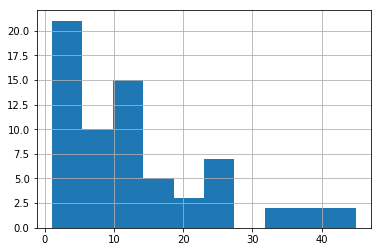

In [47]:
s.groupby('user_id').count()['stim'].hist()

In [93]:
did_pass = list(set(s['user_id'].values))

In [123]:
len(did_pass)

67

In [94]:
dx = d[~d['user_id'].isin(did_pass)]

In [110]:
dpbsh = []
for u in set(dx['user_id'].values):
    du = d[(d['user_id'] == u)]
    f = du[du['field'] == 'has_facebook']['value'].values
    t = du[du['field'] == 'has_twitter']['value'].values
    try:
        if f[0] == '3' or t[0] == '3':
            dpbsh.append(u)
    except:
        pass

In [120]:
d.groupby('user_id').count().shape

(230, 7)

In [112]:
len(dpbsh)

80

In [113]:
ddpbsh = d[d['user_id'].isin(dpbsh)]

In [129]:
ddpbsh.shape

(2925, 8)

In [135]:
compliers = set(ddpbsh[ddpbsh['field'] == 'start_demograhpics']['user_id'])

In [137]:
noncompliers = [c for c in dpbsh if not c in compliers]

In [139]:
d[d['user_id'].isin(noncompliers)]['field'].value_counts()

order                  18
has_snapchat           18
intervention           18
has_facebook           18
has_tiktok             18
has_twitter            18
has_instagram          18
has_whatsapp           18
rid                    17
asking_acc_response     1
Name: field, dtype: int64

In [184]:
u ='174.21.160.255'
order = d[(d['field'] == 'order') & (d['user_id']== u)]['value'].values[0].split(',')
order

['a_ani_dog_rain',
 'f10.jpg',
 'a_mask',
 'a_ani_cat_glass',
 'f5.jpg',
 'r8.jpg',
 'a_celeb_jlo',
 'r10.jpg',
 'a_celeb_carriefisher',
 'a_food_polenta',
 'f9.jpg',
 'f3.jpg',
 'f8.jpg',
 'a_drug_pencil',
 'a_celeb_sandler',
 'r1.jpg',
 'a_celeb_sexed',
 'f4.jpg',
 'a_ani_dog_snuggle',
 'f2.jpg',
 'r9.jpg',
 'a_food_cheeseburger',
 'a_ani_possum',
 'a_ani_cat_winter',
 'r3.jpg',
 'r4.jpg',
 'a_ani_heartnose',
 'r5.jpg',
 'a_sports_drugtest',
 'r2.jpg',
 'a_food_soupdumpling',
 'f1.jpg',
 'r6.jpg',
 'f7.jpg',
 'a_laymr',
 'a_ani_koala',
 'a_food_grilledcheese',
 'r7.jpg',
 'f6.jpg',
 'a_ani_unicornpuppy']

In [201]:
def label(x):
    if 'betty' in x:
        return 'r'
    elif 'wilma' in x:
        return 'f'
    else:
        return 'a'

s['veracity'] = s['stim'].map(label)

/usr/local/Cellar/python3/3.6.4/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [203]:
s['post'] = s['order'] > 20

/usr/local/Cellar/python3/3.6.4/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
